In [20]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

folder = Path("/data/tsl8_out/normal_001")

In [21]:
files = folder.glob("*.jpg")


def get_coords(name):
    return tuple(map(int, name.stem.split("_")[:2]))


coords = np.array([get_coords(f) for f in files])
coords.shape

(1880, 2)

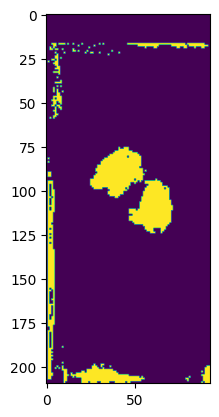

In [29]:
x = (coords / 512).astype(int)

X = np.zeros(x.max(axis=0).astype(int)[::-1] + 1)
for i, j in x:
    X[j, i] = 1

plt.imshow(X)

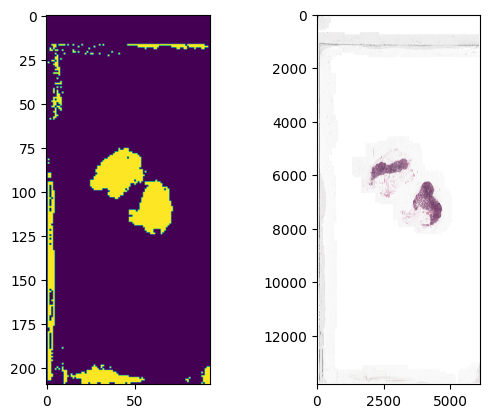

In [30]:
from tsl8.slide import make_slide_reader

with make_slide_reader("/pathology/camelyon16/training/normal/normal_001.tif", backend="cucim") as slide:
    level = 4
    img = slide.read_region((0, 0), level, slide.level_dimensions[level])

plt.subplot(121)
plt.imshow(X)
plt.subplot(122)
plt.imshow(img)